### Cycle de vie d’un projet de Machine Learning

1. **Compréhension du problème**
   - Identifier l'objectif du projet
   - Déterminer les contraintes et les attentes
   - Définir les métriques de performance

2. **Collecte des données**
   - Récupération des données depuis différentes sources (bases de données, API, fichiers, etc.)
   - Vérification de la disponibilité et de la qualité des données

3. **Vérifications des données**
   - Vérifier les valeurs manquantes
   - Identifier les valeurs aberrantes
   - Vérifier la cohérence des données

4. **Analyse exploratoire des données (EDA)**
   - Visualisation des distributions des données
   - Étude des corrélations entre les variables
   - Détection des tendances et patterns

5. **Prétraitement des données**
   - Nettoyage des données (traitement des valeurs manquantes et aberrantes)
   - Normalisation ou standardisation des variables
   - Encodage des variables catégorielles
   - Séparation des ensembles d’entraînement et de test

6. **Entraînement du modèle**
   - Sélection d’algorithmes adaptés (régression, classification, clustering, etc.)
   - Ajustement des hyperparamètres
   - Validation croisée

7. **Choix du meilleur modèle**
   - Évaluation des performances à l’aide des métriques adaptées (accuracy, F1-score, RMSE, etc.)
   - Comparaison des modèles
   - Optimisation et ajustements finaux

### 1) Énoncé du problème
- Ce projet vise à comprendre comment la performance des étudiants (scores aux tests) est influencée par d'autres variables telles que le genre, l'origine ethnique, le niveau d'éducation des parents, le type de déjeuner et la participation à un cours de préparation aux tests.

### 2) Collecte des données
- Source du jeu de données : [Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- Les données contiennent 8 colonnes et 1000 lignes.

### 2.1 Imports des packets requis
####  Importation de Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importation du fichier

In [2]:
df = pd.read_csv('data/stud.csv')

#### nous allons afficher quelques informations du datasets

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.shape

(1000, 8)

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### on voit que les moyennes des scores ne sont pas tres differentes ils sont alentours de 66 a 69 tout comme l ecart moyent etre chacunes des notes de chacun des sujet est plutot grande car elle se situe entre 14 et 15 points et aussi on peut denoter que la distrubition des notes est tres bonne car la mediane et la moyennes sont presque egales on voit aussi que environs 75% des etudiants on moins d environs 80 points au trois epreuves

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### On constate que ce dataset n'a pas de donnees manquantes ni de duplicatats

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Exploration des donnees

In [10]:
print("Catégories dans la variable 'gender' :     ", end=" ")
print(df['gender'].unique())

print("Catégories dans la variable 'race_ethnicity' :  ", end=" ")
print(df['race_ethnicity'].unique())

print("Catégories dans la variable 'parental level of education' : ", end=" ")
print(df['parental_level_of_education'].unique())

print("Catégories dans la variable 'lunch' :     ", end=" ")
print(df['lunch'].unique())

print("Catégories dans la variable 'test preparation course' :     ", end=" ")
print(df['test_preparation_course'].unique())


Catégories dans la variable 'gender' :      ['female' 'male']
Catégories dans la variable 'race_ethnicity' :   ['group B' 'group C' 'group A' 'group D' 'group E']
Catégories dans la variable 'parental level of education' :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Catégories dans la variable 'lunch' :      ['standard' 'free/reduced']
Catégories dans la variable 'test preparation course' :      ['none' 'completed']


In [11]:
# Définir les colonnes numériques et catégorielles
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Afficher les colonnes
print('Nous avons {} caractéristiques numériques : {}'.format(len(numeric_features), numeric_features))
print('\nNous avons {} caractéristiques catégorielles : {}'.format(len(categorical_features), categorical_features))


Nous avons 3 caractéristiques numériques : ['math_score', 'reading_score', 'writing_score']

Nous avons 5 caractéristiques catégorielles : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### ajout de deux colones pour le totales des scores et la moyenne de chaques eleve

In [12]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Nombre d\'étudiants ayant obtenu la note maximale en Mathématiques : {math_full}')
print(f'Nombre d\'étudiants ayant obtenu la note maximale en Écriture : {writing_full}')
print(f'Nombre d\'étudiants ayant obtenu la note maximale en Lecture : {reading_full}')


Nombre d'étudiants ayant obtenu la note maximale en Mathématiques : 7
Nombre d'étudiants ayant obtenu la note maximale en Écriture : 14
Nombre d'étudiants ayant obtenu la note maximale en Lecture : 17


In [17]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Nombre d\'étudiants ayant moins de 20 points en Mathématiques : {math_less_20}')
print(f'Nombre d\'étudiants ayant moins de 20 points en Écriture : {writing_less_20}')
print(f'Nombre d\'étudiants ayant moins de 20 points en Lecture : {reading_less_20}')


Nombre d'étudiants ayant moins de 20 points en Mathématiques : 4
Nombre d'étudiants ayant moins de 20 points en Écriture : 3
Nombre d'étudiants ayant moins de 20 points en Lecture : 1


In [19]:
reading_less_20 = df[df['reading_score'] <= 50]['average'].count()
writing_less_20 = df[df['writing_score'] <= 50]['average'].count()
math_less_20 = df[df['math_score'] <= 50]['average'].count()

print(f'Nombre d\'étudiants ayant moins de 50 points en Mathématiques : {math_less_20}')
print(f'Nombre d\'étudiants ayant moins de 50 points en Écriture : {writing_less_20}')
print(f'Nombre d\'étudiants ayant moins de 50 points en Lecture : {reading_less_20}')


Nombre d'étudiants ayant moins de 50 points en Mathématiques : 150
Nombre d'étudiants ayant moins de 50 points en Écriture : 124
Nombre d'étudiants ayant moins de 50 points en Lecture : 97


### 4. Exploration des données (Visualisation)
#### 4.1 Visualisation de la distribution des scores moyens pour en tirer des conclusions
- Histogramme
- Fonction de distribution par noyau (KDE - Kernel Density Estimation)

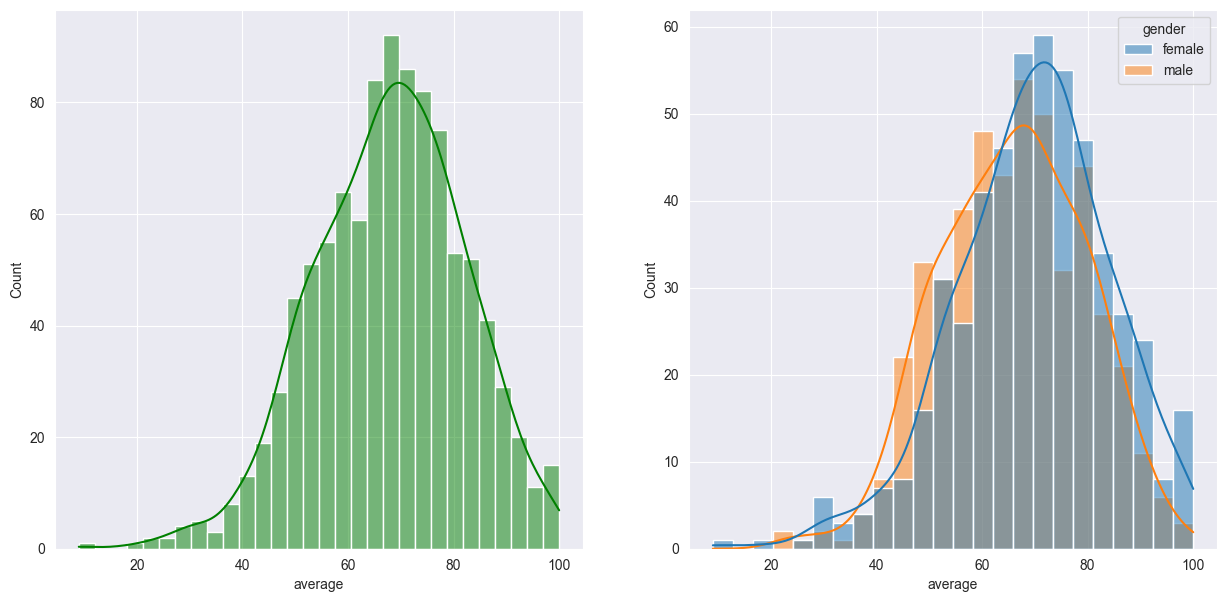

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

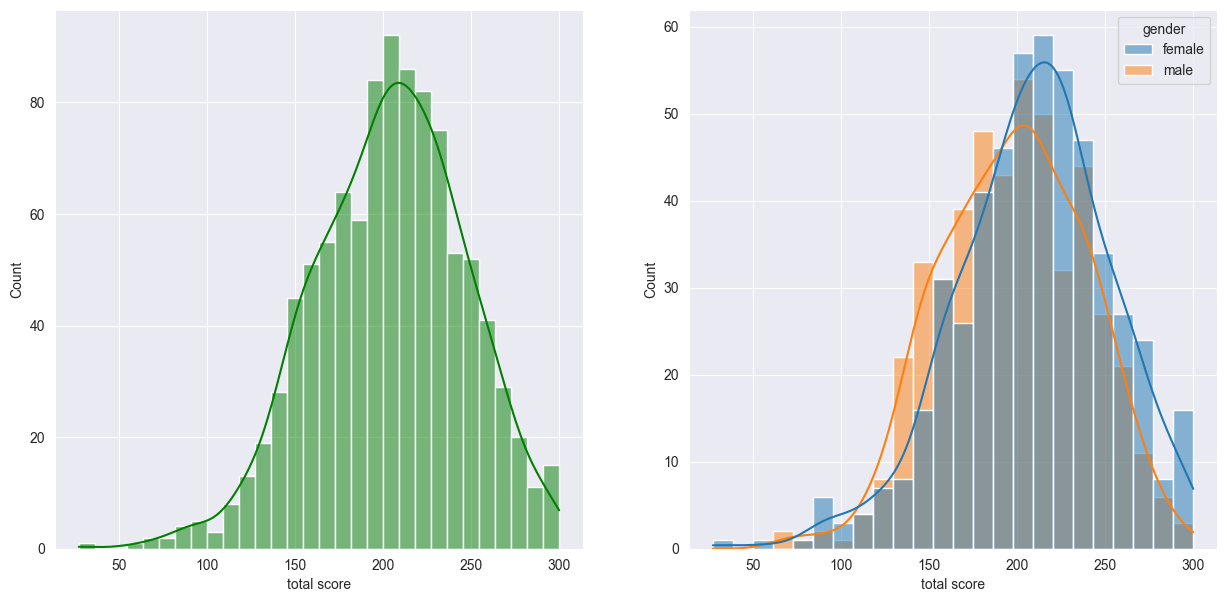

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

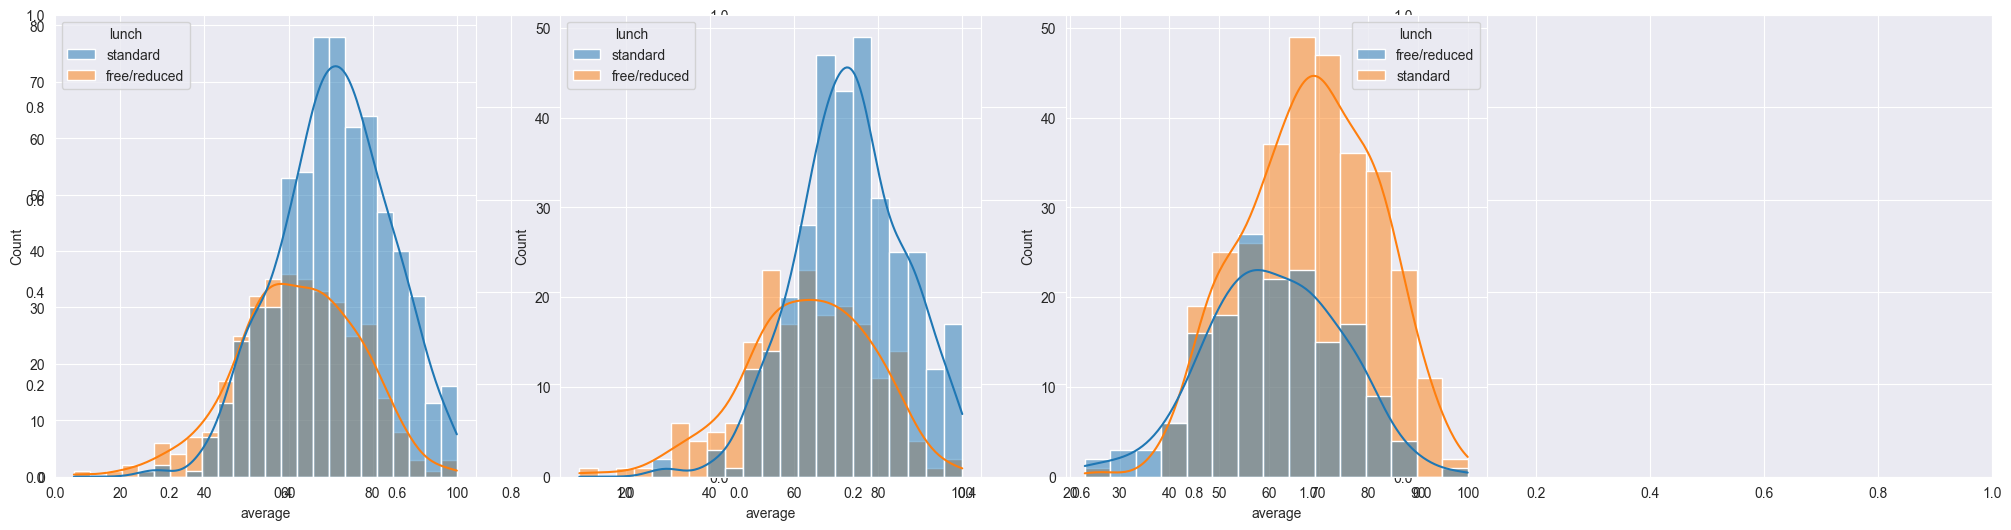

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

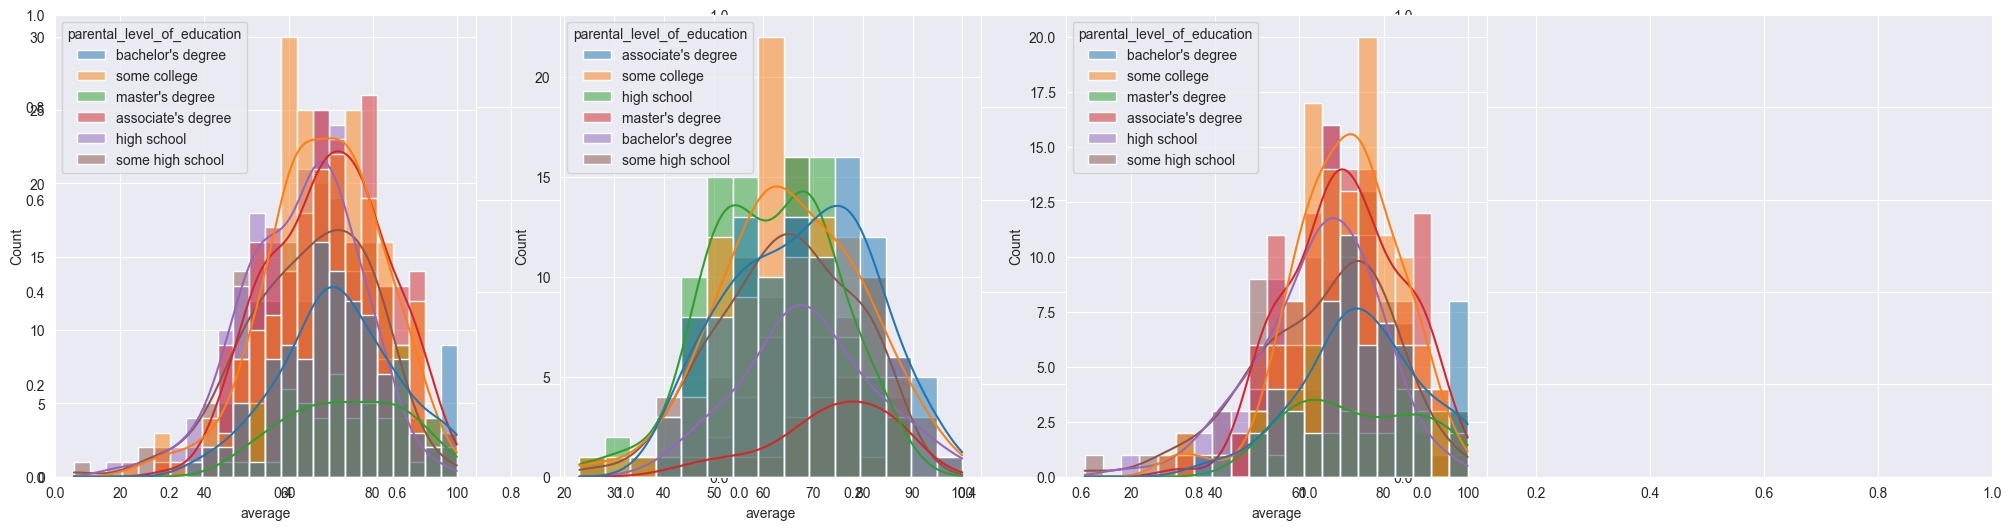

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

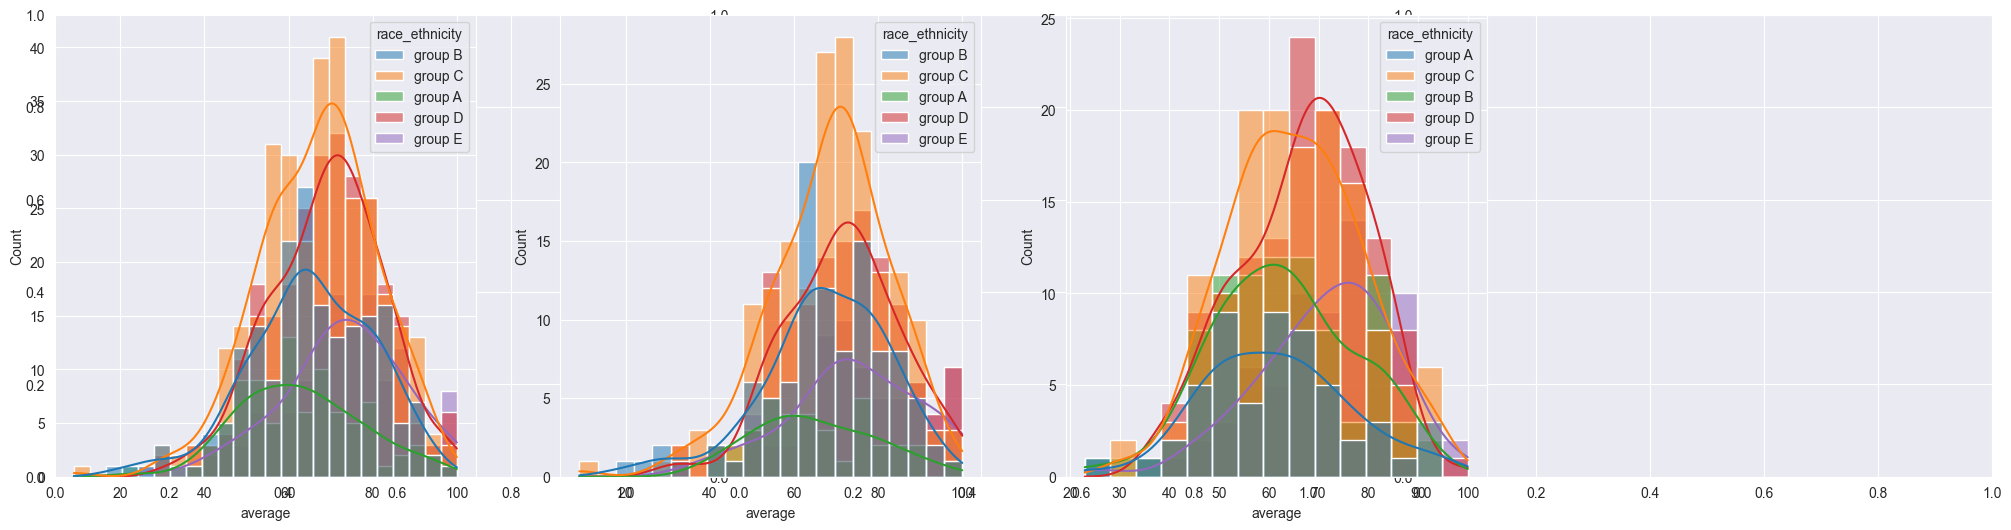

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

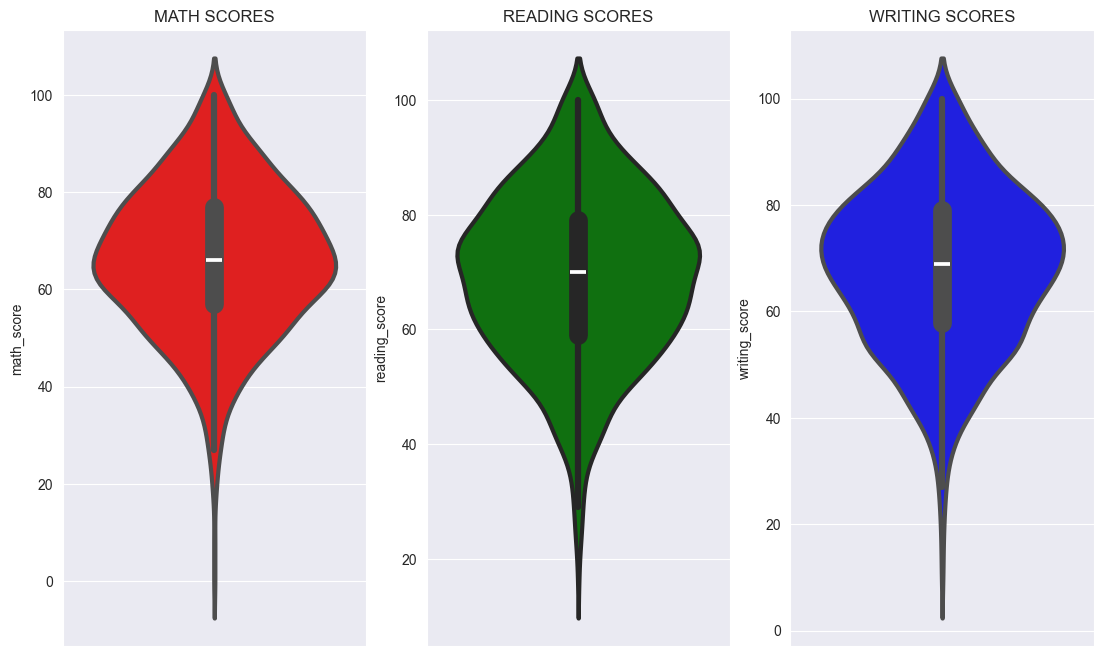

In [33]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

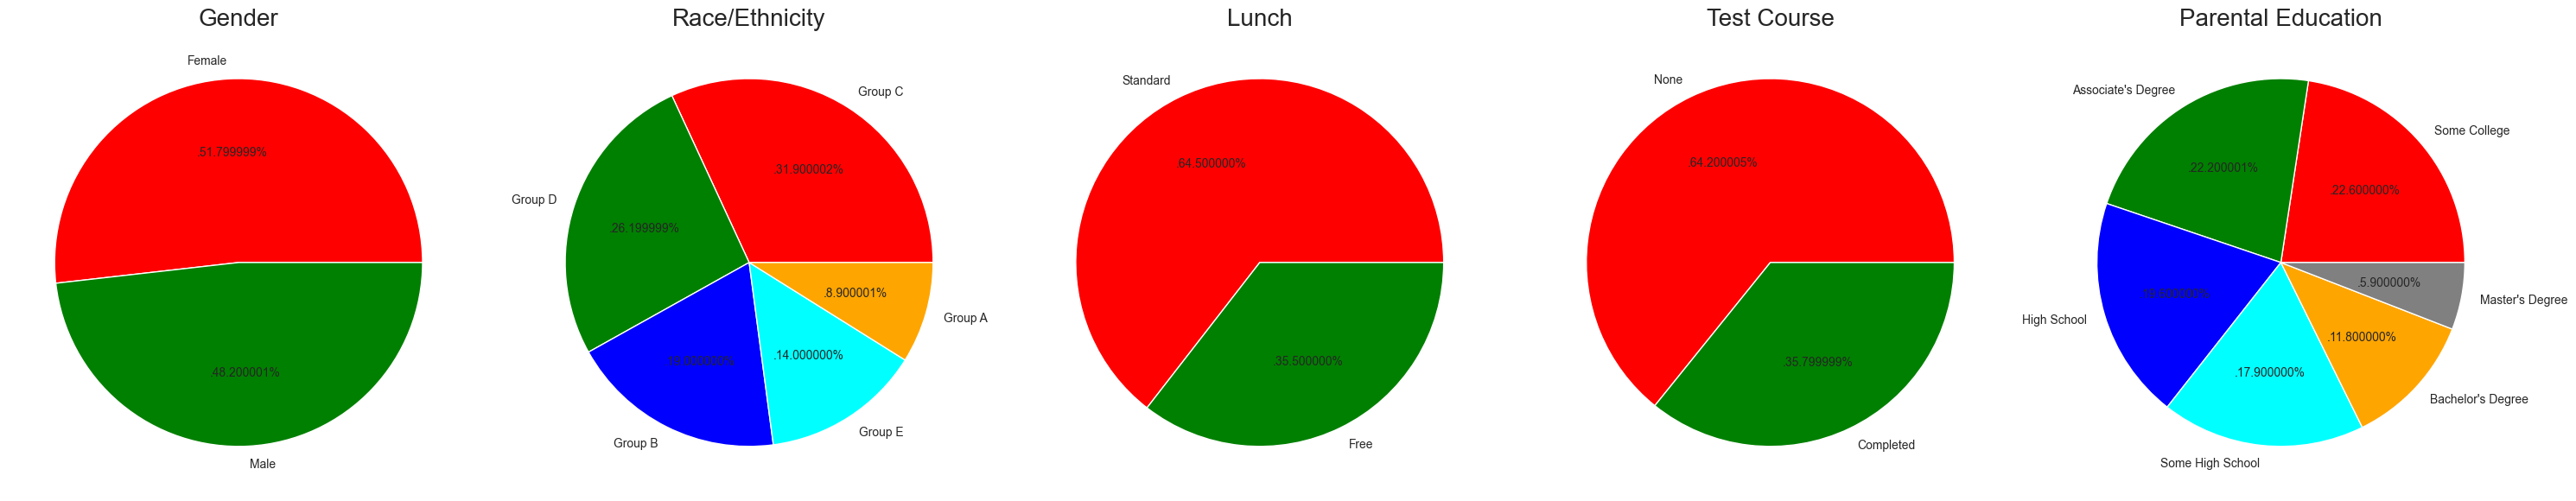

In [35]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [34]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

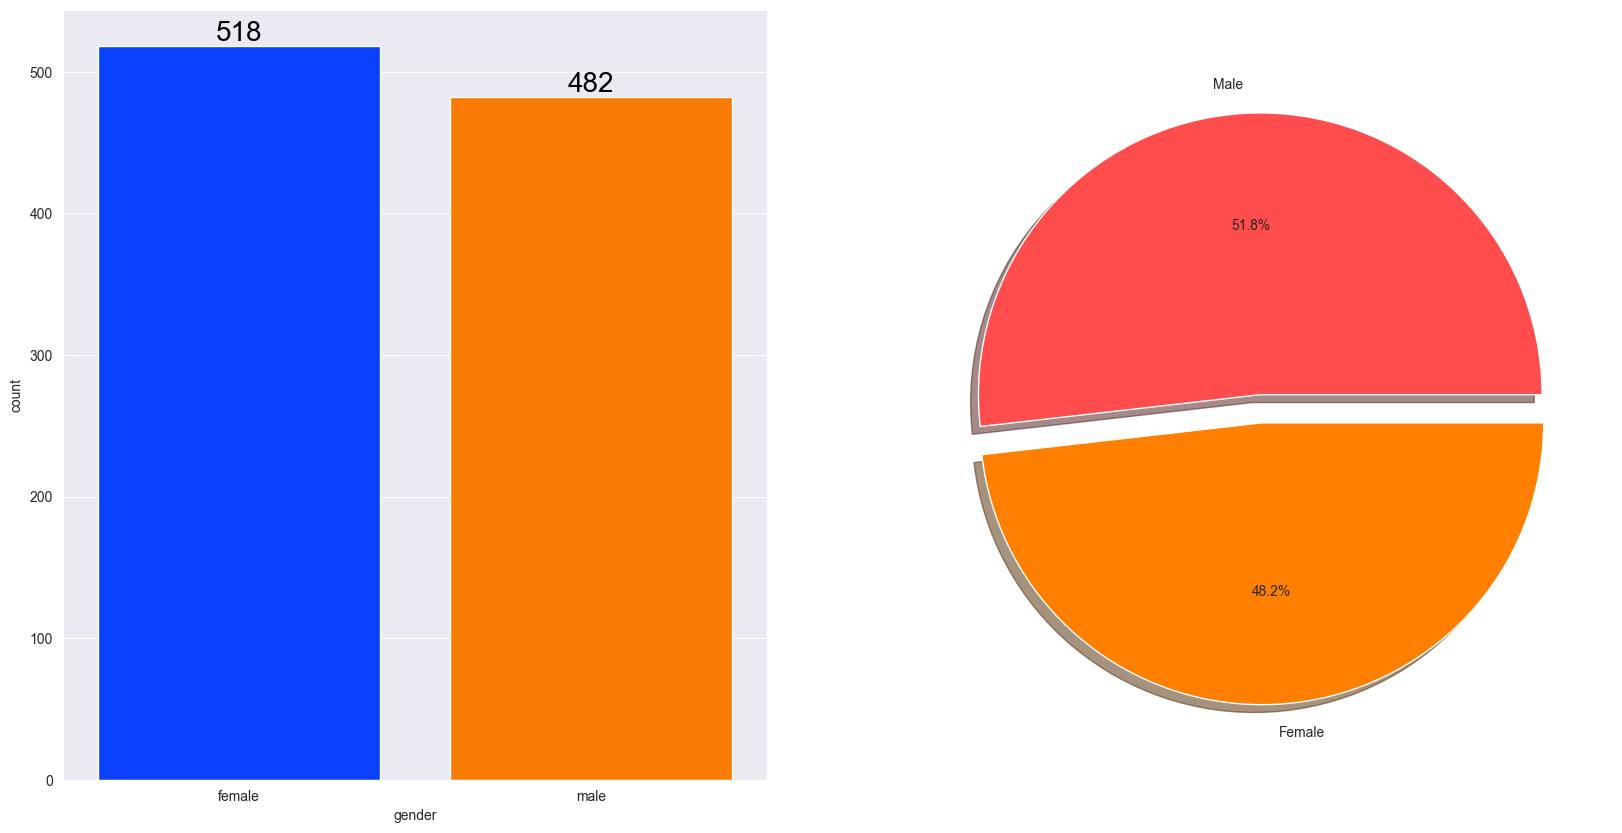

In [36]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [42]:
gender_group = df.groupby('gender')[['writing_score', 'math_score', 'average', 'reading_score']].mean()
gender_group.head()

,writing_score,math_score,average,reading_score
gender,,,,
female,72.467181,63.633205,69.569498,72.608108
male,63.311203,68.728216,65.837483,65.473029


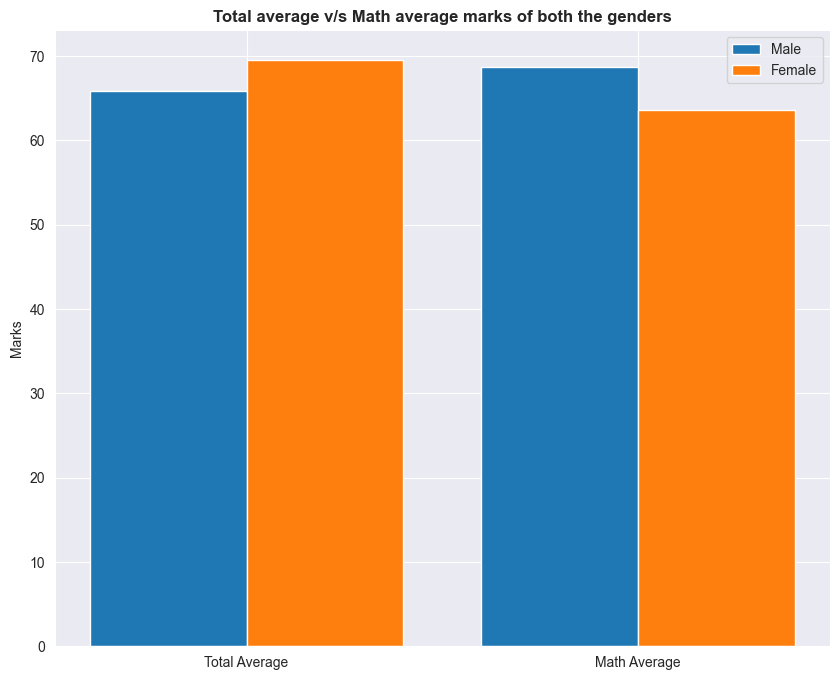

In [43]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

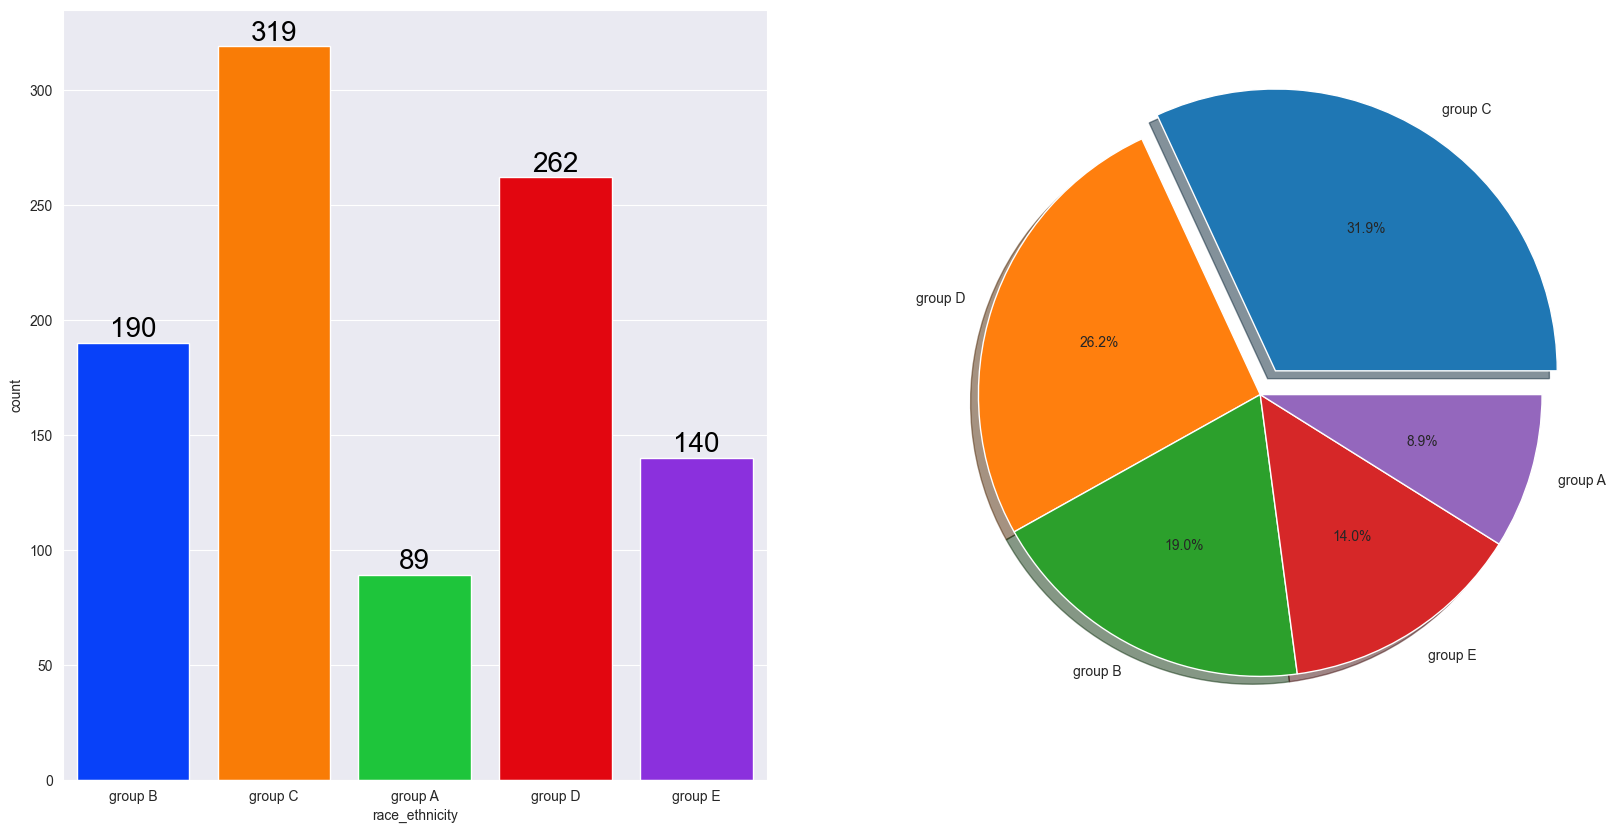

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

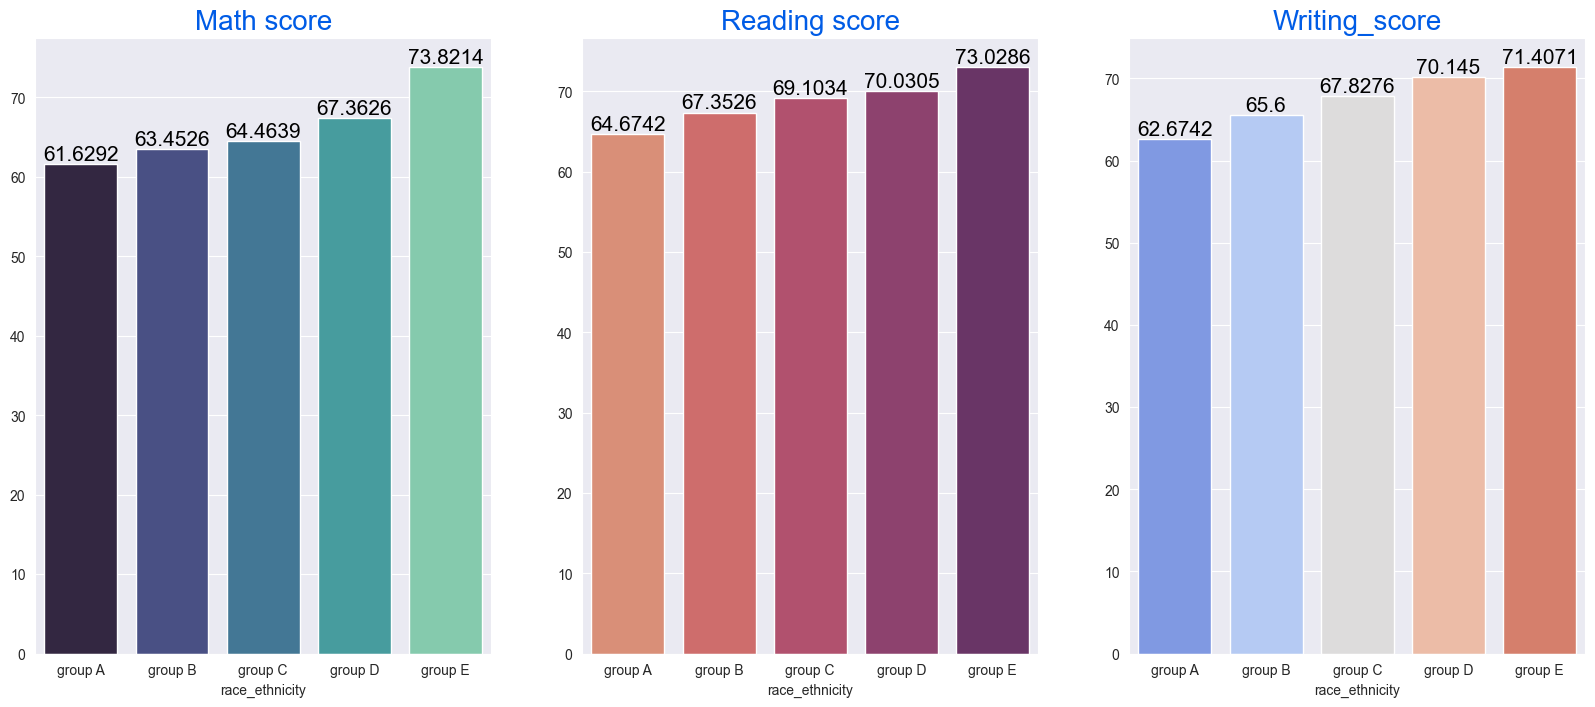

In [46]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

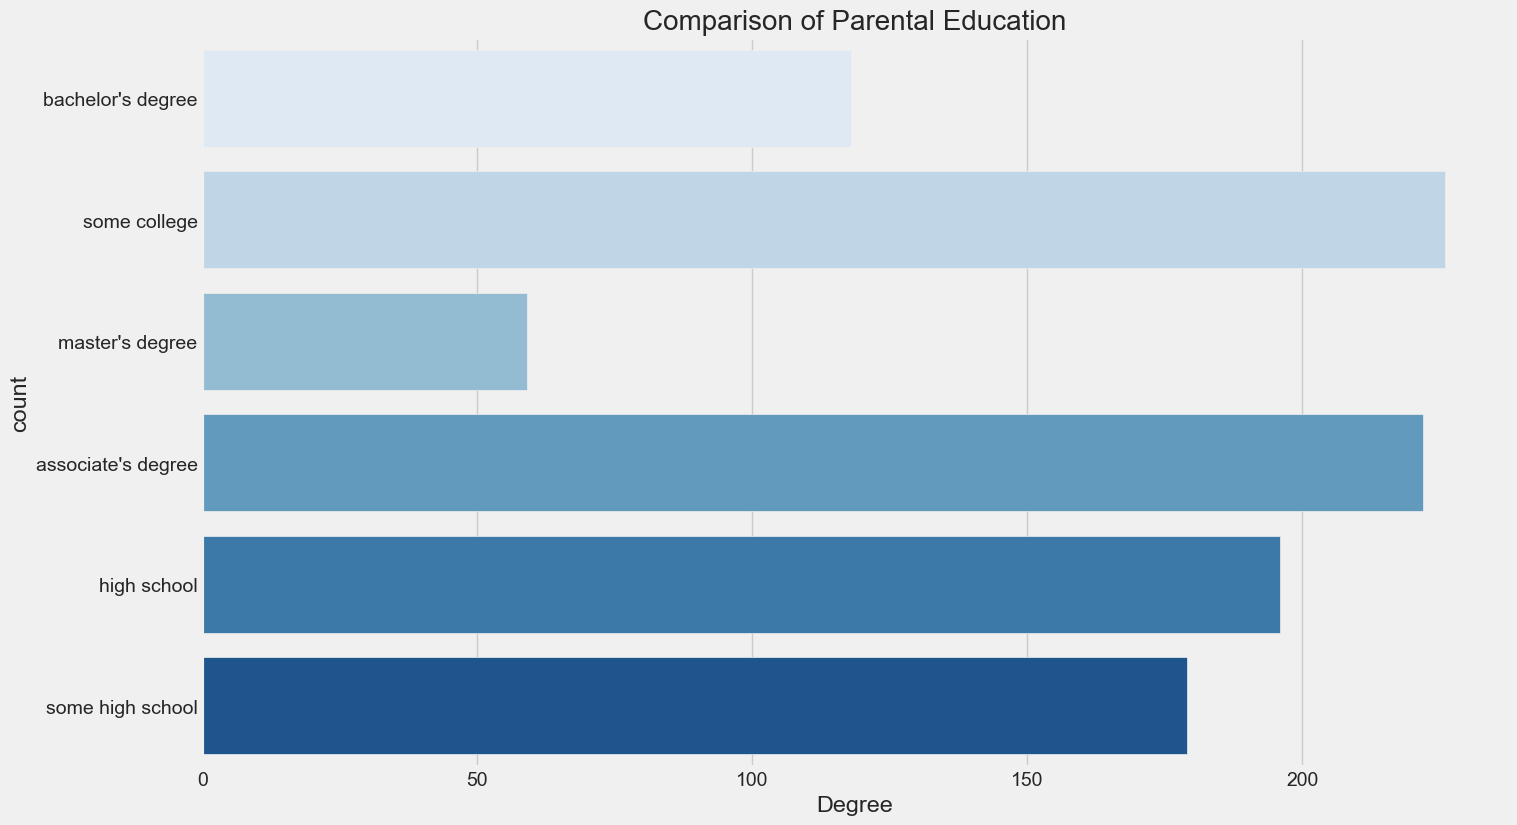

In [47]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

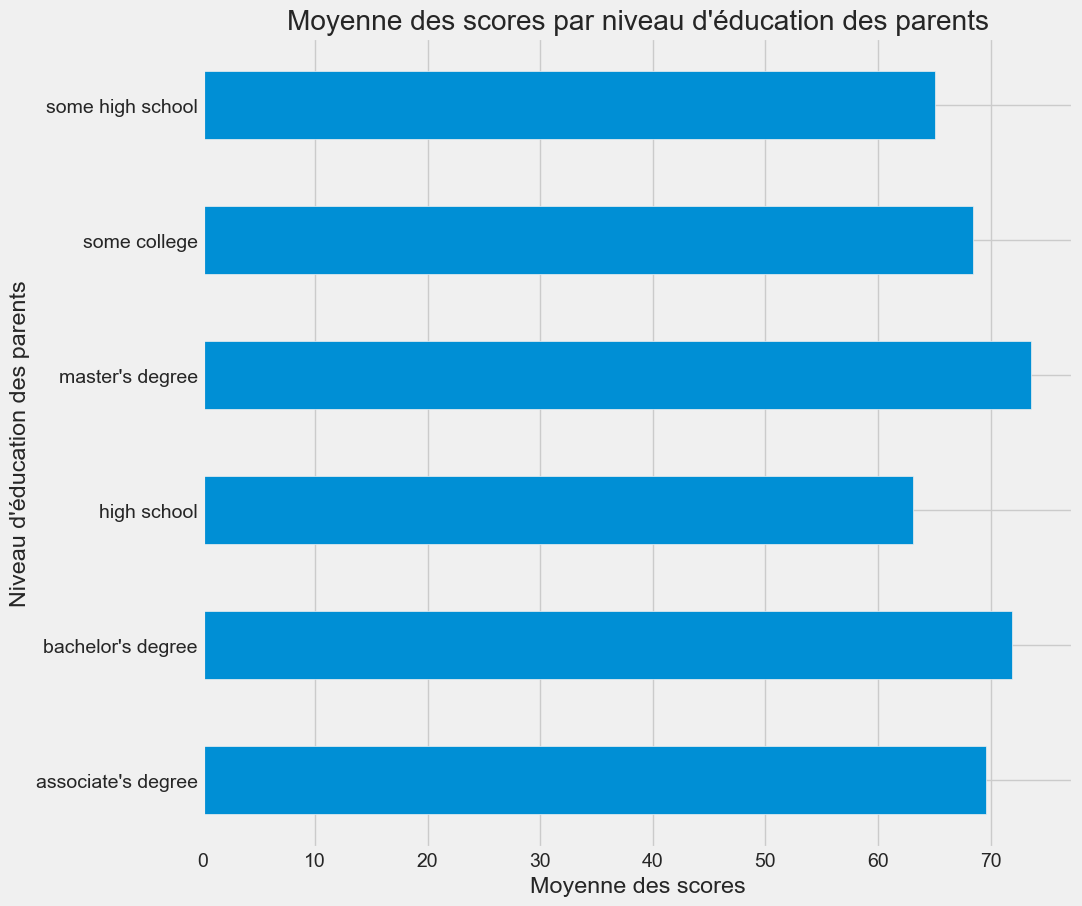

In [51]:
df.groupby('parental_level_of_education')['average'].mean().plot(kind='barh', figsize=(10, 10))
plt.xlabel('Moyenne des scores')
plt.ylabel("Niveau d'éducation des parents")
plt.title("Moyenne des scores par niveau d'éducation des parents")
plt.show()


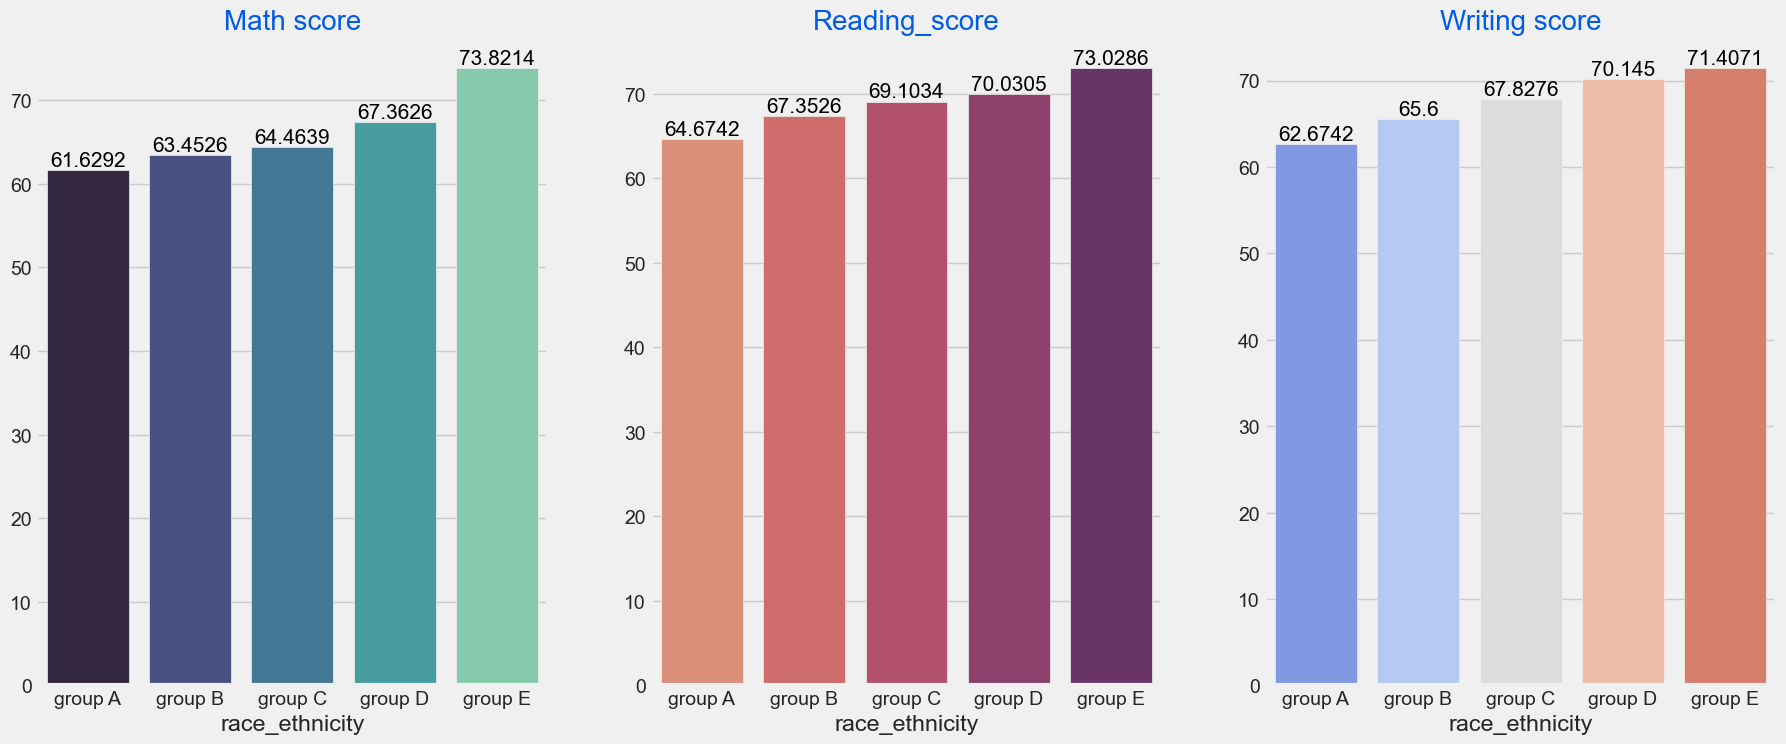

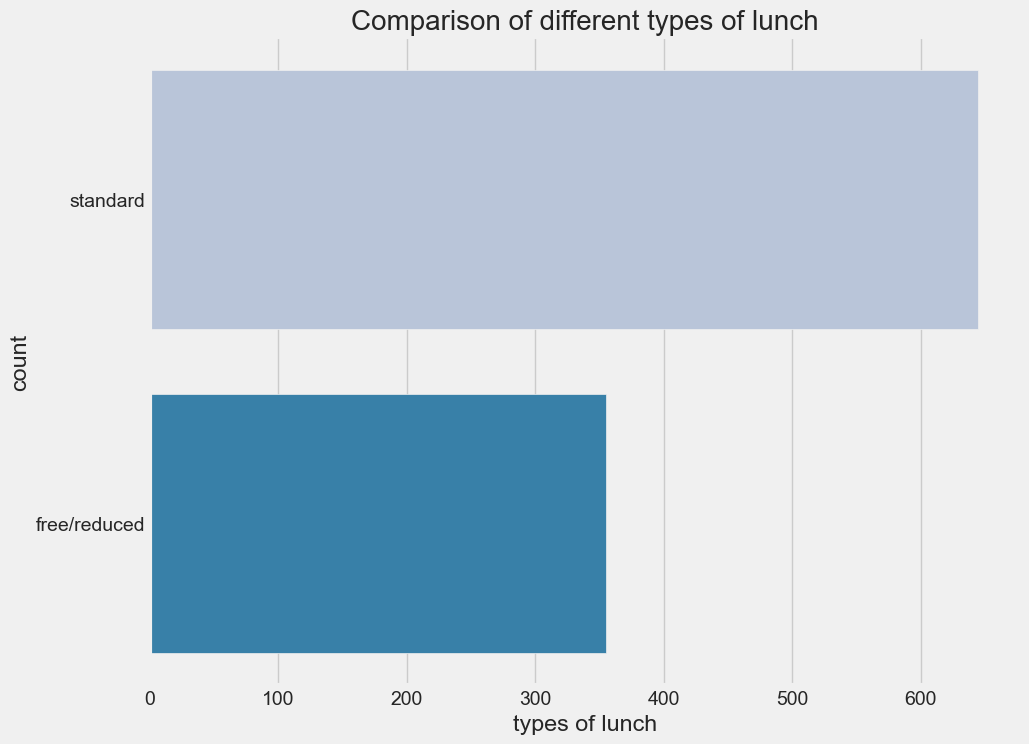

In [60]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

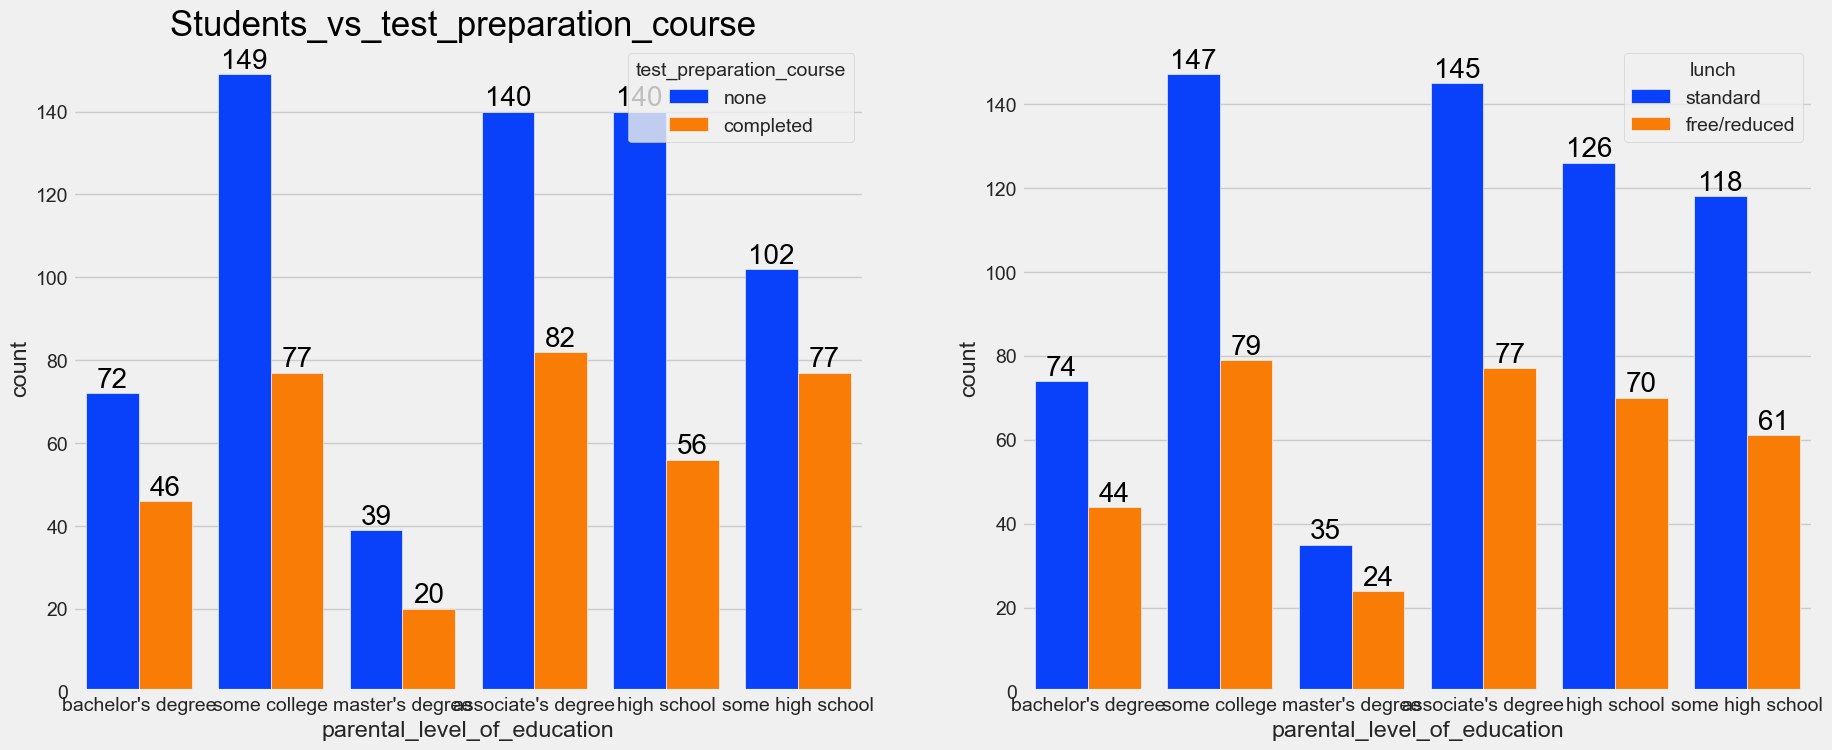

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students_vs_test_preparation_course ',color='black',size=25)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)


<Axes: xlabel='lunch', ylabel='writing_score'>

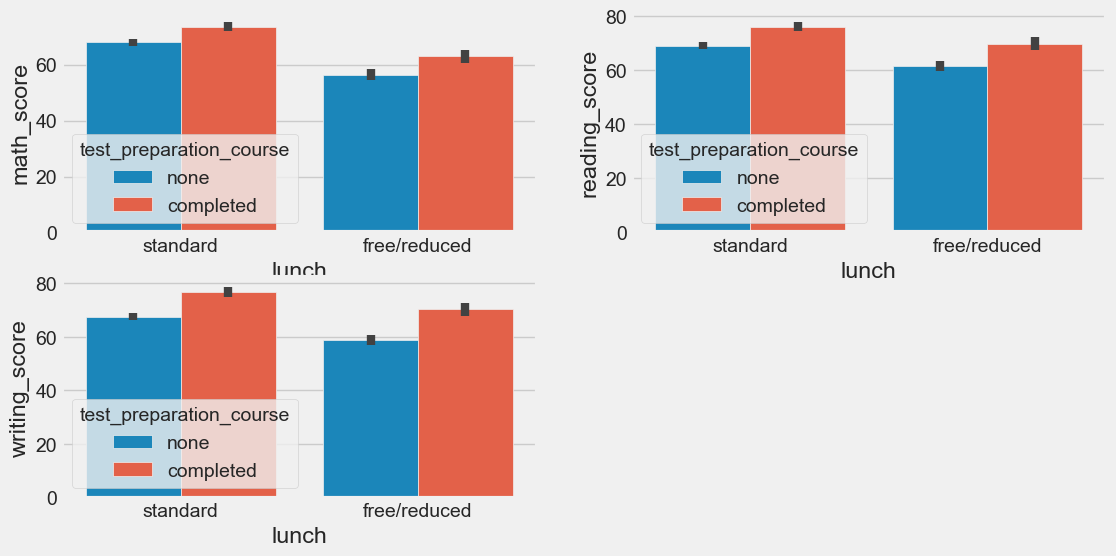

In [70]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

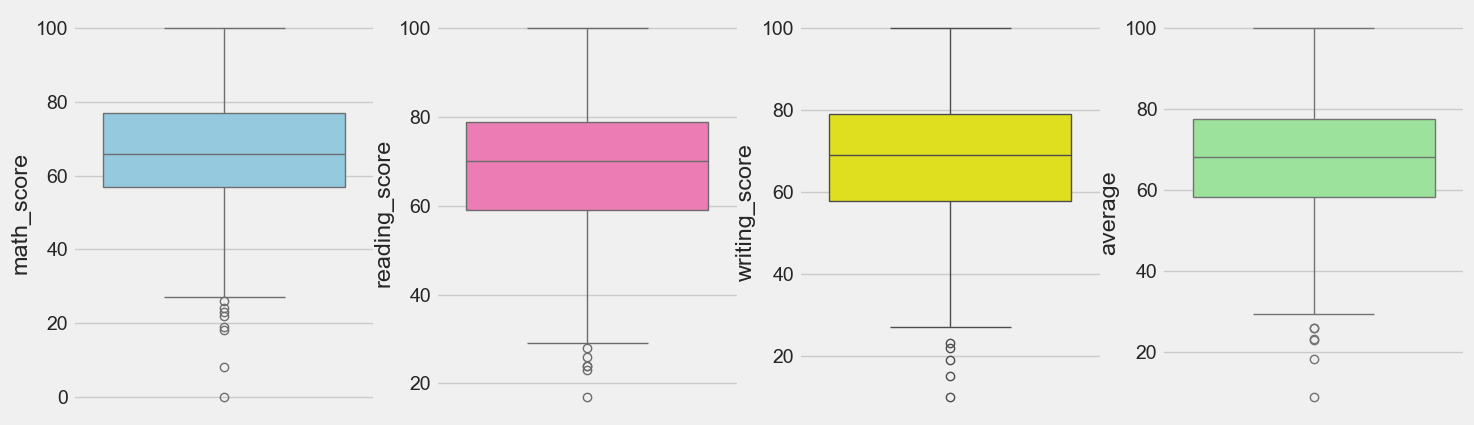

In [72]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

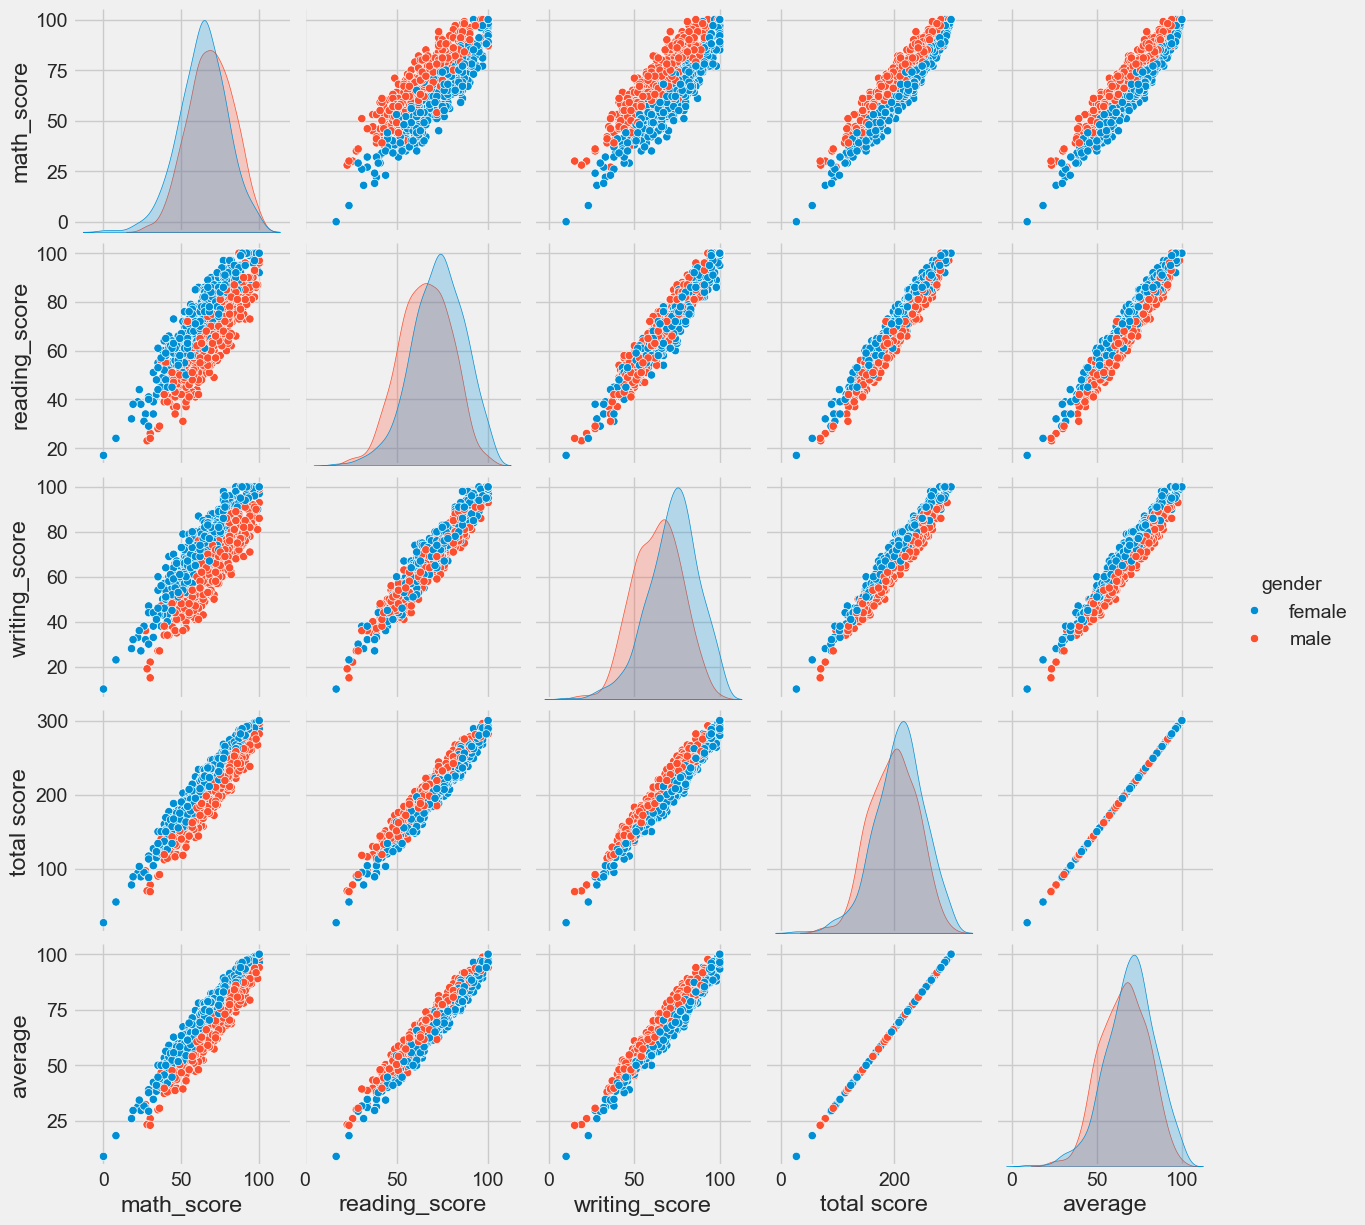

In [73]:
sns.pairplot(df,hue = 'gender')
plt.show()